In [1]:
#------------------------------imports------------------------------
import numpy as np
from scipy.optimize import fsolve
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [2]:
#------------------------------SS values------------------------------
MM_N2 = 14.0067*2
MM_H2 = 1.00784*2
N2_frac = 0.25
H2_frac = 0.75
MM_mix = MM_N2*N2_frac + MM_H2*H2_frac   #g/mol
molar_flow = 1304.85    #mol/s
mass_flow = molar_flow*MM_mix / 1000   #kg/s
density_mix = 8.81609     #kg/m^3
SG = density_mix / 997
volumetric_flow = mass_flow/density_mix #m^3/s

In [3]:
#------------------------------------------Given variables------------------------------------------------------
V = 1
k0 = 0.0001
Ea = 60000
R = 8.314
T = 866.85+273.15
k = k0*np.exp(-Ea/(R*T))
F = volumetric_flow
CN2_in = molar_flow*N2_frac / F
CH2_in = molar_flow*H2_frac / F
CNH3_in = 0

In [4]:
#------------------------------------------Using fsolve------------------------------------------------------
def solve(y):
    CN2, CH2, CNH3 = y
    eqn1 = F*CN2_in/V - F*CN2/V - k*CN2*CH2**3
    eqn2 = F*CH2_in/V - F*CH2/V - 3*k*CN2*CH2**3
    eqn3 = F*CNH3_in/V - F*CNH3/V + 2*k*CN2*CH2**3
    return eqn1, eqn2, eqn3
guess = [81, 247, 353]
CN2_initial, CH2_initial, CNH3_initial = fsolve(solve,guess)
print(CN2_initial, CH2_initial, CNH3_initial)

82.45446234858046 247.3633870457413 352.7643643149599


In [5]:
tau = 10   #s
Kp = 1/12
ksi = 3
P_initial = 9
del_P = 2
x_initial = Kp*P_initial
Cv = volumetric_flow / np.sqrt(x_initial) / np.sqrt(2/SG)

In [6]:
A = tau**2
B = 2*ksi*tau

In [7]:
t_end = 400
times = np.linspace(0,t_end,10000)
Ps = np.zeros(len(times))
for i in range(0, len(times)):
    if times[i] <=50:
        Ps[i] = P_initial
    else: Ps[i] = P_initial + del_P

In [8]:
x = np.zeros(len(Ps))
y = np.zeros(len(Ps))
x[0] = x_initial
y[0] = 0
del_h = times[1]-times[0]
def position(Ps): 
    for i in range(0, len(Ps)-1):
        dxdt = y[i]
        dydt = -B/A*dxdt - 1/A*x[i] + Kp/A*Ps[i] 
        x[i+1] = x[i] + dxdt*del_h
        y[i+1] = y[i] + dydt*del_h
    return x,y

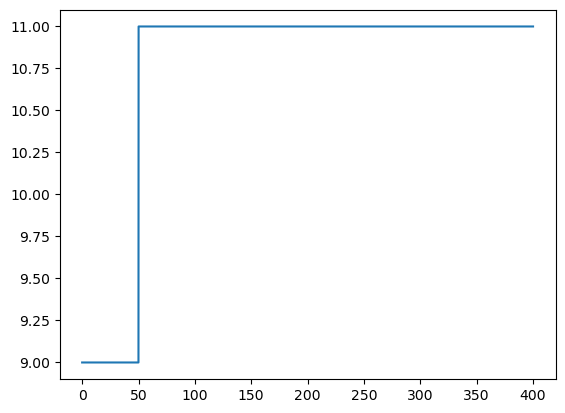

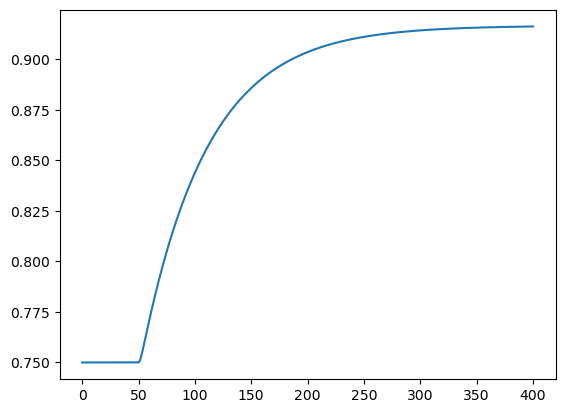

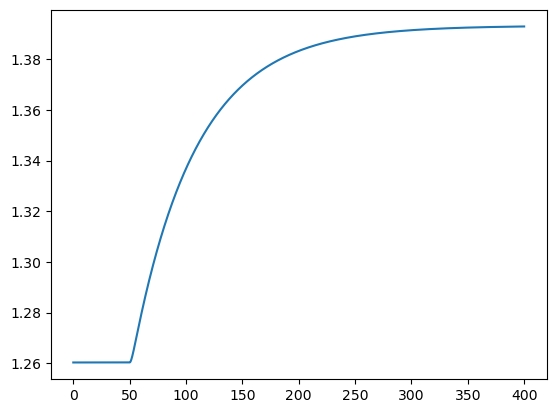

In [9]:
x,y = position(Ps)
Fs = Cv * x**0.5 * np.sqrt(2/SG)
plt.figure(0)
plt.plot(times, Ps)
plt.figure(1)
plt.plot(times, x)
plt.figure(2)
plt.plot(times, Fs)
plt.show()

In [13]:
CN2_list = [CN2_initial]
CH2_list = [CH2_initial]
CNH3_list = [CNH3_initial]

CN2 = CN2_initial
CH2 = CH2_initial
CNH3 = CNH3_initial
print(CN2)

for i in range(0,len(Fs)-1):
    dcn2dt = Fs[i]*(CN2_in - CN2) - k*CN2*CH2**3
    dch2dt = Fs[i]*(CH2_in - CH2) - 3*k*CN2*CH2**3
    dcnh3dt = Fs[i]*(CNH3_in - CNH3) + 2*k*CN2*CH2**3
    
    CN2 = CN2 + dcn2dt*del_h
    CH2 = CH2 + dch2dt*del_h
    CNH3 = CNH3 + dcnh3dt*del_h
    
    CN2_list.append(CN2)
    CH2_list.append(CH2)
    CNH3_list.append(CNH3)
    print(dcn2dt)

print(CN2_list[-1], CH2_list[-1], CNH3_list[-1])

82.45446234858046
-5.684341886080802e-14
-5.684341886080802e-14
-5.684341886080802e-14
-5.684341886080802e-14
-5.684341886080802e-14
-5.684341886080802e-14
-5.684341886080802e-14
-5.684341886080802e-14
-5.684341886080802e-14
-5.684341886080802e-14
-5.684341886080802e-14
-5.684341886080802e-14
-5.684341886080802e-14
-5.684341886080802e-14
-5.684341886080802e-14
-5.684341886080802e-14
-5.684341886080802e-14
-5.684341886080802e-14
-5.684341886080802e-14
-5.684341886080802e-14
-5.684341886080802e-14
-5.684341886080802e-14
-5.684341886080802e-14
-5.684341886080802e-14
-5.684341886080802e-14
-5.684341886080802e-14
-5.684341886080802e-14
-5.684341886080802e-14
-5.684341886080802e-14
-5.684341886080802e-14
-5.684341886080802e-14
-5.684341886080802e-14
-5.684341886080802e-14
-5.684341886080802e-14
-5.684341886080802e-14
-5.684341886080802e-14
-5.684341886080802e-14
-5.684341886080802e-14
-5.684341886080802e-14
-5.684341886080802e-14
-5.684341886080802e-14
-5.684341886080802e-14
-5.6843418860808

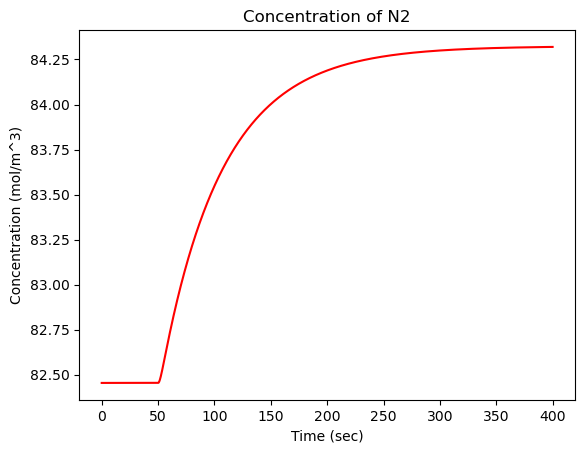

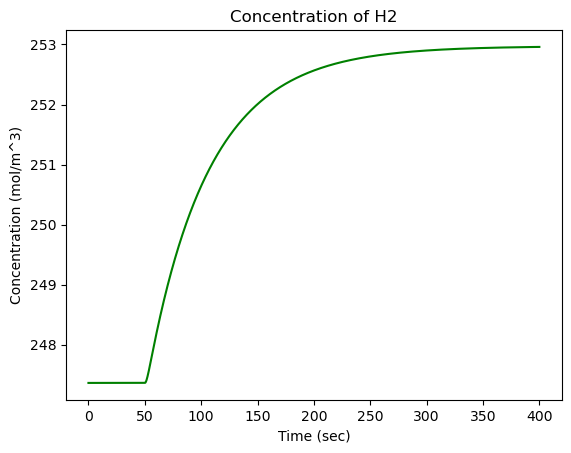

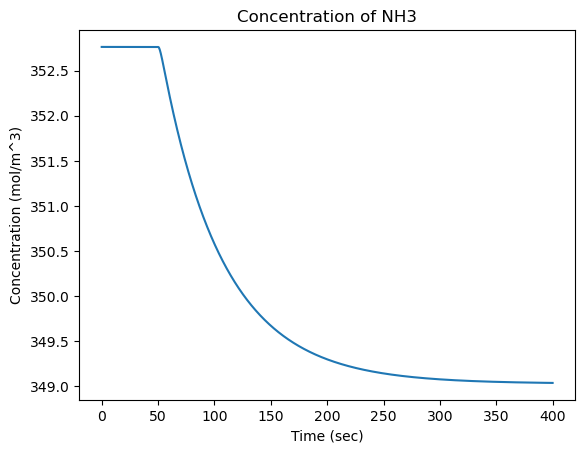

In [11]:
plt.figure(1)
plt.plot(times, CN2_list, "r")
plt.title("Concentration of N2")
plt.xlabel("Time (sec)")
plt.ylabel("Concentration (mol/m^3)")
plt.figure(2)
plt.plot(times, CH2_list, "g")
plt.title("Concentration of H2")
plt.xlabel("Time (sec)")
plt.ylabel("Concentration (mol/m^3)")
plt.figure(3)
plt.plot(times, CNH3_list)
plt.title("Concentration of NH3")
plt.xlabel("Time (sec)")
plt.ylabel("Concentration (mol/m^3)")
plt.show()

In [ ]:
plt.figure(0)
plt.title("Pressure vs Time")
plt.xlabel("Pressure (psi)")
plt.ylabel("Time (s)")
plt.figure(1)
plt.title("Pressure vs Time")
plt.xlabel("Pressure (psi)")
plt.ylabel("Time (s)")
plt.figure(2)
plt.title("Pressure vs Time")
plt.xlabel("Pressure (psi)")
plt.ylabel("Time (s)")
plt.figure(3)
plt.title("Pressure vs Time")
plt.xlabel("Pressure (psi)")
plt.ylabel("Time (s)")
plt.figure(4)
plt.title("Pressure vs Time")
plt.xlabel("Pressure (psi)")
plt.ylabel("Time (s)")
plt.show()

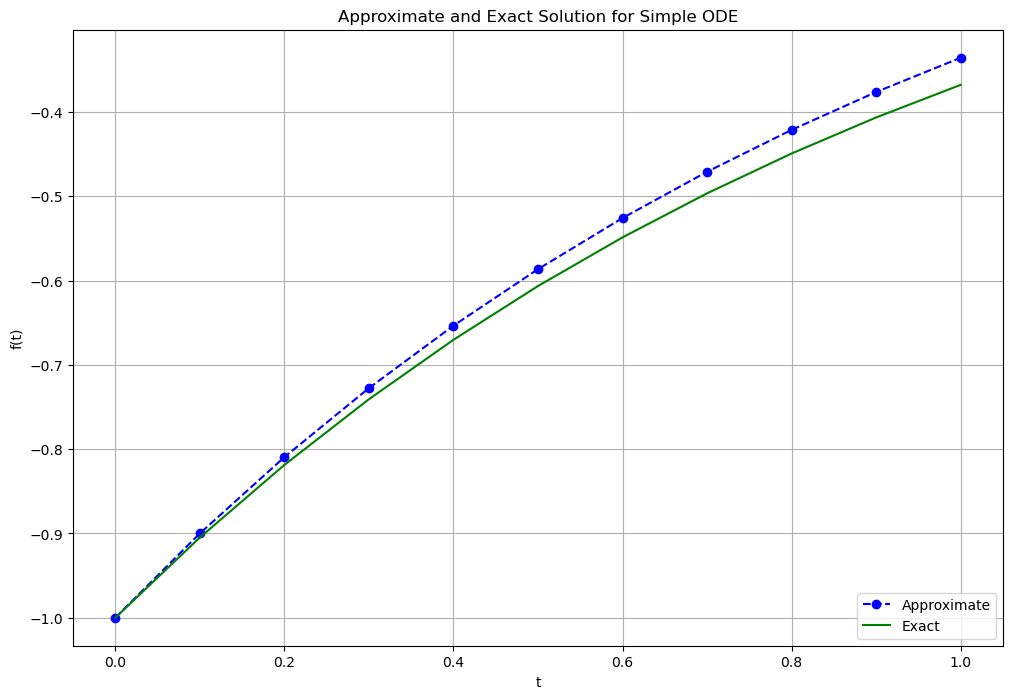

In [12]:
# Define parameters
#f = lambda t, s: np.exp(-t) # ODE
def f(t):
    return np.exp(-t)
h = 0.1 # Step size
t = np.arange(0, 1 + h, h) # Numerical grid
s0 = -1 # Initial Condition

# Explicit Euler Method
s = np.zeros(len(t))
s[0] = s0

for i in range(0, len(t) - 1):
    s[i + 1] = s[i] + h*f(t[i])

plt.figure(figsize = (12, 8))
plt.plot(t, s, 'bo--', label='Approximate')
plt.plot(t, -np.exp(-t), 'g', label='Exact')
plt.title('Approximate and Exact Solution \
for Simple ODE')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

This is the final function but with 3 for loops. I've modified the code now to have only 1 for loop

In [ ]:
#------------------------------------------Known variables------------------------------------------------------
tau = 10   #s
Kp = 1/12
zeta = 3
P_initial = 9
del_P = 2
#----------------------------------------Initial calculations---------------------------------------------------
x_initial = Kp*P_initial
SG = density_mix / 997
Cv = volumetric_flow / np.sqrt(x_initial) / np.sqrt(2/SG)
#------------------------------------------Chosen variables-----------------------------------------------------
M = 2   #Chosen step change in pressure
t_end = 400  #Time to integrate to
steps = 10000    #Steps for integration
t_step_change = 50    #Time at which the pressure undergoes a step change

#--------------------------Solver function-----------------------------------------------------
def euler_solver(t_end, steps, t_step_change, M):
#------------------------------------------Initialize values----------------------------------------------------    
    times = np.linspace(0, t_end, steps)
    dt = times[1] - times[0]
    Ps = np.zeros(len(times))
    x = np.zeros(len(times))
    y = np.zeros(len(times))
    CN2 = np.zeros(len(times))
    CH2 = np.zeros(len(times))
    CNH3 = np.zeros(len(times))
    x[0] = x_initial
    y[0] = 0
    CN2[0] = CN2_ss
    CH2[0] = CH2_ss
    CNH3[0] = CNH3_ss
#-------------------------------------------For loop 1----------------------------------------------------------   
    for i in range(0, len(times)):
#----------------------------------Get pressures with step change-----------------------------------------------        
        if times[i] <= t_step_change:
            Ps[i] = P_initial
        else:
            Ps[i] = P_initial + M
#-------------------------------------------For loop 2---------------------------------------------------------
    for j in range(0, len(Ps)-1):
#-----------------------------------------Solve for x values---------------------------------------------------           
        dxdt = y[j]
        dydt = -2*zeta/tau*dxdt - x[j]/tau**2 + Kp*Ps[j]/tau**2 
        x[j+1] = x[j] + dxdt*dt
        y[j+1] = y[j] + dydt*dt
#----------------------------------------Calculating flowrate--------------------------------------------------
    Fs = Cv * x**0.5 * np.sqrt(2/SG)
#-------------------------------------------For loop 3---------------------------------------------------------
    for p in range(0, len(times)-1):
#--------------------------------------Solve for concentrations------------------------------------------------
        dcn2dt = Fs[p]*(CN2_in - CN2[p]) - k*CN2[p]*CH2[p]**3
        dch2dt = Fs[p]*(CH2_in - CH2[p]) - 3*k*CN2[p]*CH2[p]**3
        dcnh3dt = Fs[p]*(CNH3_in - CNH3[p]) + 2*k*CN2[p]*CH2[p]**3
        CN2[p+1] = CN2[p] + dcn2dt*dt
        CH2[p+1] = CH2[p] + dch2dt*dt
        CNH3[p+1] = CNH3[p] + dcnh3dt*dt
    
    return times, Ps, x, Fs, CN2, CH2, CNH3

times, Ps, x, Fs, CN2, CH2, CNH3 = euler_solver(t_end, steps, t_step_change, M)